In [14]:
import pandas as pd

results_milestones_oct24 = 'Milestones - timesStandard-prod-Oct24.csv'
df = pd.read_csv(results_milestones_oct24)
# We will now focus on the specific columns for the milestones
df.drop(df[df['Participant'] == 'ap3535@nau.edu'].index, inplace = True)
df


,Participant,start,issue,problem,folder,file,class,method,line,solution,...,sound solution,alternative answer,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,...,n,NaN,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,y,NaN,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,...,y,N,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,n,NaN,y,y,Control,4612,1.0,1.0,NaN,NaN
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,y,N,y,y,Treatment,5069,NaN,NaN,4.0,2.0
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,n,NaN,y,y,Control,5485,1.0,1.0,NaN,NaN
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,2.0,0.0
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,y,NaN,y,NaN,Treatment,5485,NaN,NaN,5.0,1.0
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,...,y,N,y,NaN,Control,5069,2.0,2.0,NaN,NaN


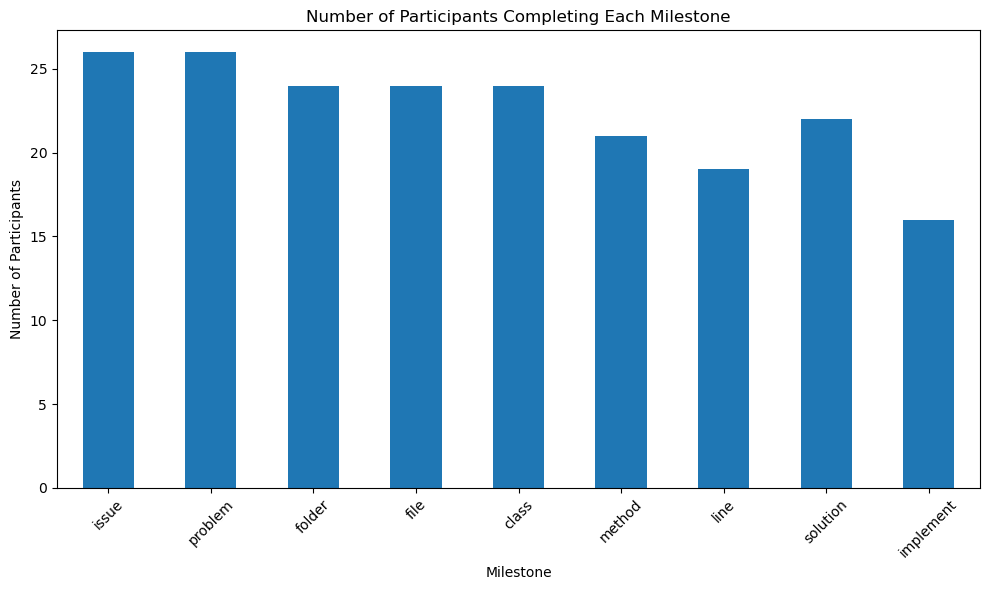

In [15]:
milestone_columns = ['issue', 'problem', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the number of participants that completed each milestone
milestone_counts = df[milestone_columns].notna().sum()

# Plotting the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
milestone_counts.plot(kind='bar')
plt.title('Number of Participants Completing Each Milestone')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

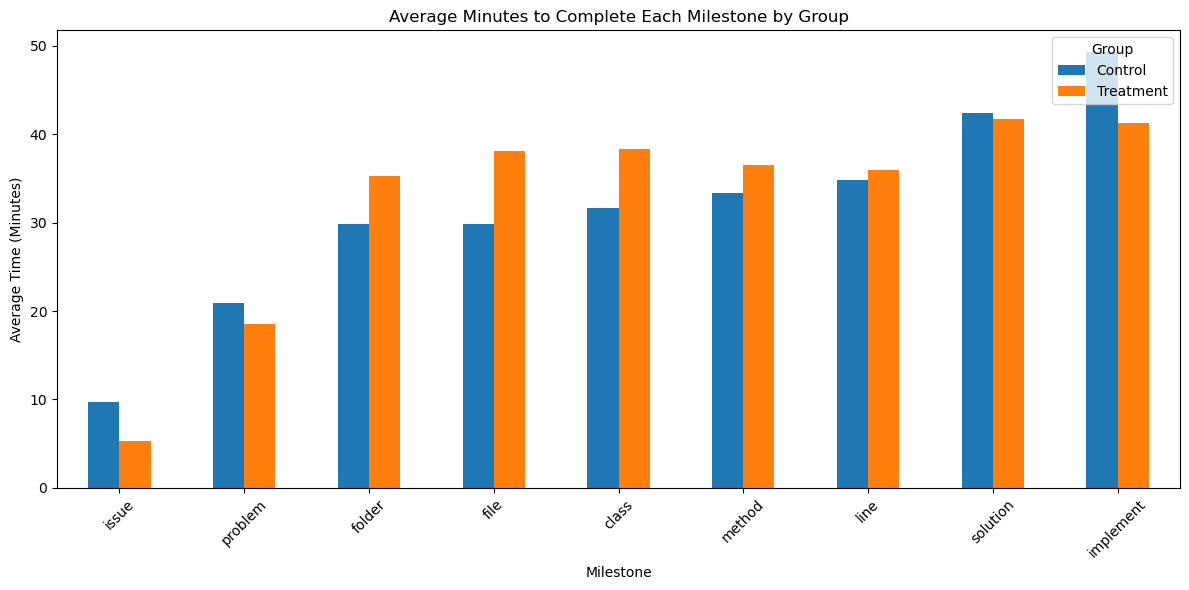

In [16]:
# Convert the relevant columns to numeric, ensuring to handle errors in case of NaN values
df[milestone_columns] = df[milestone_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average time (in minutes) it took participants to complete each milestone, divided by group
grouped_avg_time = df.groupby('group')[milestone_columns].mean()

# Plot the average minutes to complete milestones by group
grouped_avg_time.T.plot(kind='bar', figsize=(12, 6))

plt.title('Average Minutes to Complete Each Milestone by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


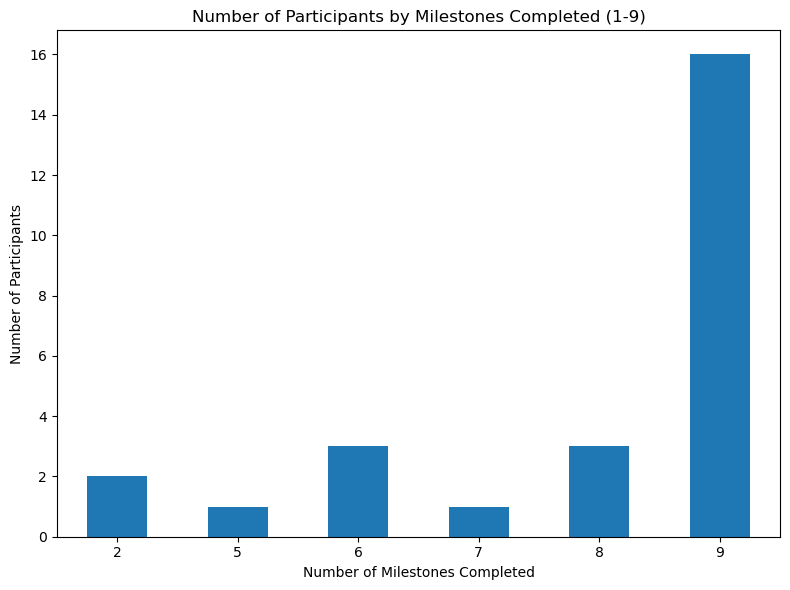

In [17]:
# Count the number of milestones completed by each participant (ignoring NaN values)
milestones_completed = df[milestone_columns].notna().sum(axis=1)

# Count how many participants completed each possible number of milestones (from 1 to 9)
milestones_distribution = milestones_completed.value_counts().sort_index()

# Plot the distribution of participants by the number of milestones completed
plt.figure(figsize=(8, 6))
milestones_distribution.plot(kind='bar')
plt.title('Number of Participants by Milestones Completed (1-9)')
plt.xlabel('Number of Milestones Completed')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


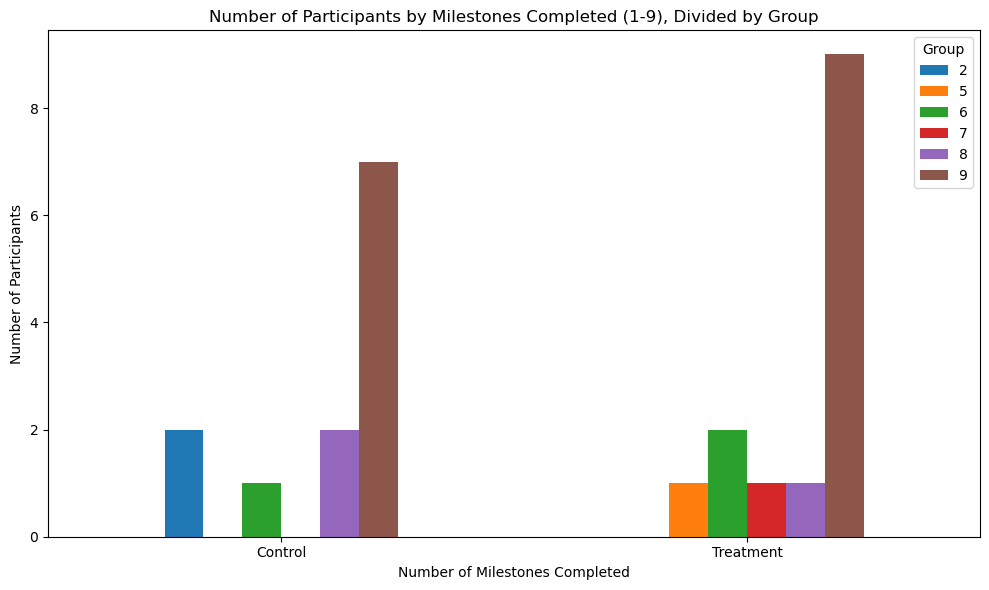

In [18]:
# Correcting the previous approach by simplifying the process

# Count the number of milestones completed by each participant, separated by group
df['milestones_completed'] = df[milestone_columns].notna().sum(axis=1)

# Group by both group and milestones completed, then count participants
grouped_distribution = df.groupby(['group', 'milestones_completed']).size().unstack(fill_value=0)

# Plotting the result
grouped_distribution.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Participants by Milestones Completed (1-9), Divided by Group')
plt.xlabel('Number of Milestones Completed')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


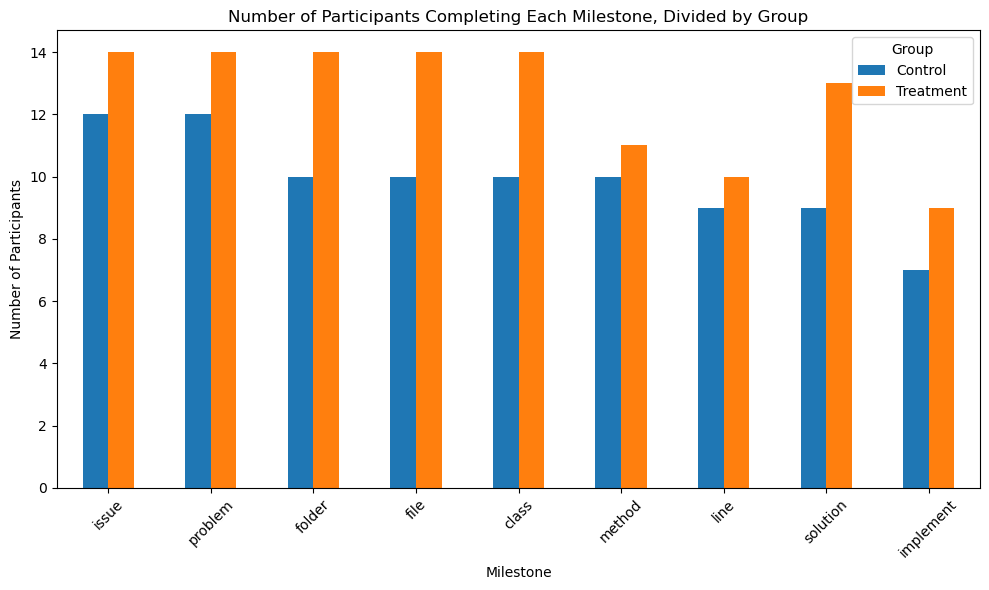

In [19]:
# Calculate the number of participants that completed each milestone, divided by group
milestone_counts_by_group = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().sum())

# Plotting the bar chart divided by group
milestone_counts_by_group.T.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Participants Completing Each Milestone, Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
# Calculate the total completion rates by group (i.e., how many milestones were completed out of all possible milestones)
total_milestones_possible = len(milestone_columns) * len(df)

# Sum the non-null values (completed milestones) for both groups
total_completion_by_group = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().sum().sum())

# Calculate the completion rate as a percentage
completion_rate_by_group = (total_completion_by_group / total_milestones_possible) * 100

# Show the results
completion_rate_by_group


group
Control      38.034188
Treatment    48.290598
dtype: float64

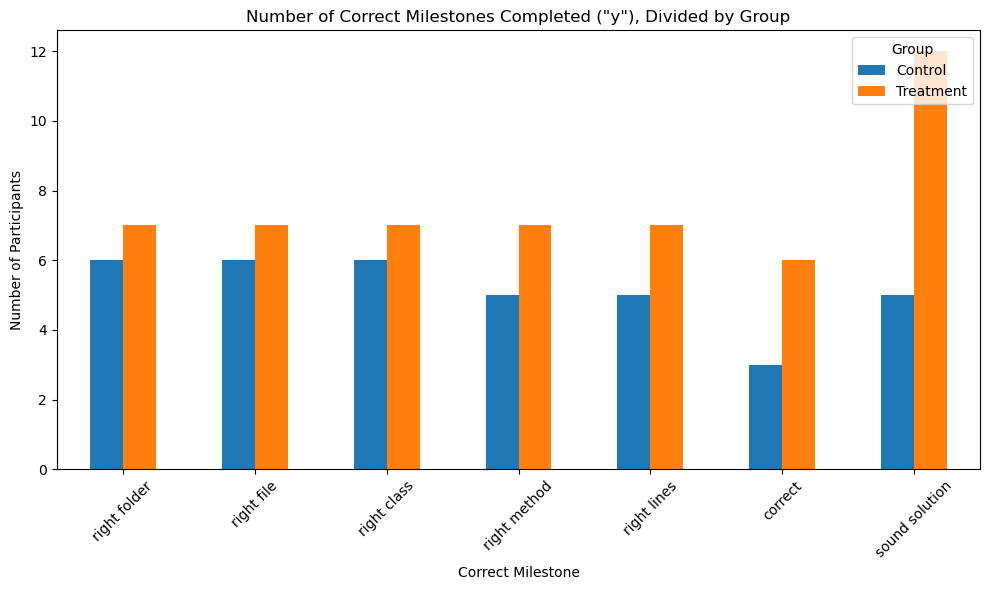

In [22]:
# Filter the columns for the correct milestones where the value is 'y'
correct_milestone_counts_by_group_y = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum())

# Plotting the updated bar chart divided by group
correct_milestone_counts_by_group_y.T.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Correct Milestones Completed ("y"), Divided by Group')
plt.xlabel('Correct Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()





Analyze correlation between experience and time.

Highlight differences in milestone completion patterns.



Analyze individual milestone completion per experience range.

Compare solution quality based on experience.


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_46195/3030453764.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())


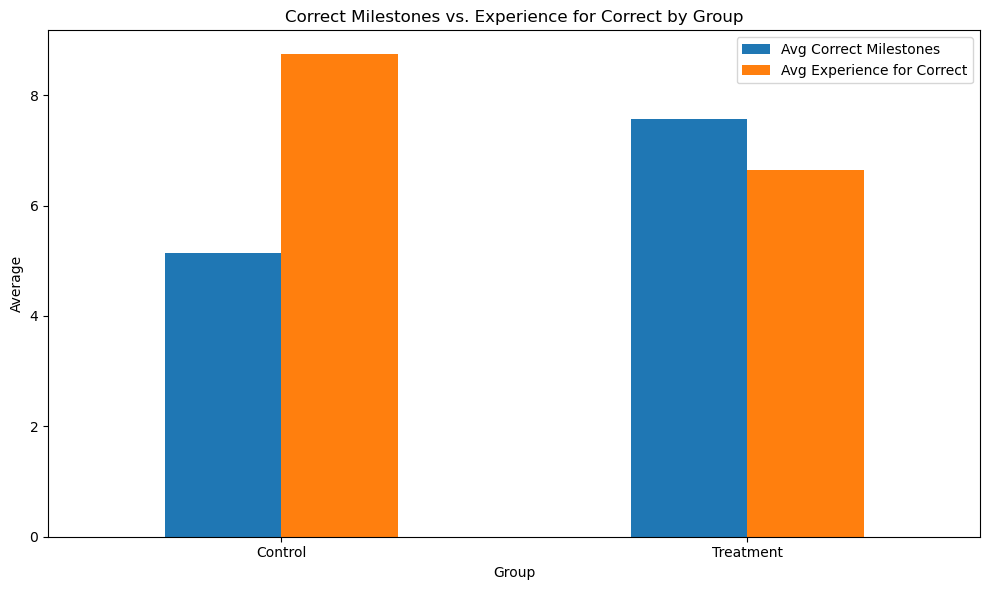

In [26]:
# Define the relevant columns
correct_milestones_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Ensure the YOE columns are numeric
df['Control YOE'] = pd.to_numeric(df['Control YOE'], errors='coerce')
df['Alt YOE'] = pd.to_numeric(df['Alt YOE'], errors='coerce')

# Map 'Control YOE' for Control group and 'Alt YOE' for Treatment group
df['Experience'] = df.apply(lambda row: row['Control YOE'] if row['group'] == 'Control' else row['Alt YOE'], axis=1)

# Mask correct milestones and use experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average years of experience for participants who completed milestones correctly
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())

# Create a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)
})

# Plot the comparison
comparison_correct_experience_df.plot(kind='bar', figsize=(10, 6))

plt.title('Correct Milestones vs. Experience for Correct by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

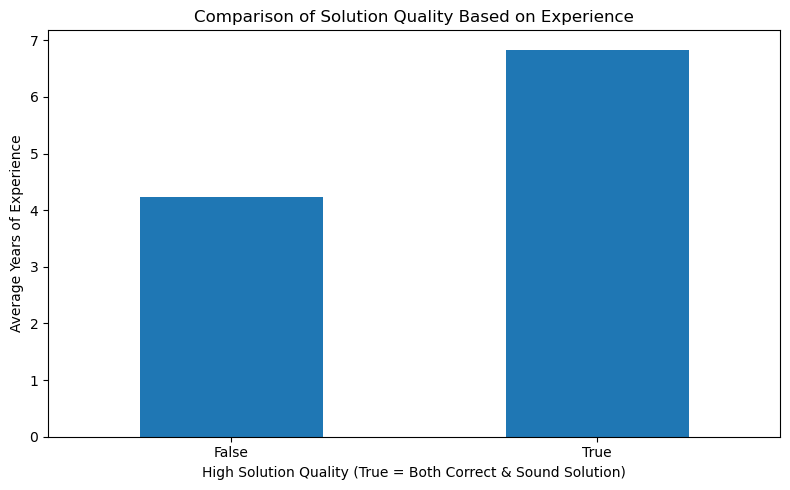

In [27]:
# Create a new column indicating if both 'correct' and 'sound solution' are 'y' (high solution quality)
df['high_solution_quality'] = df.apply(lambda row: (row['correct'] == 'y') & (row['sound solution'] == 'y'), axis=1)

# Calculate the average experience for participants with high solution quality vs those without
avg_experience_solution_quality = df.groupby('high_solution_quality')['Experience'].mean()

# Plotting the result
avg_experience_solution_quality.plot(kind='bar', figsize=(8, 5))

plt.title('Comparison of Solution Quality Based on Experience')
plt.xlabel('High Solution Quality (True = Both Correct & Sound Solution)')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_46195/1612003897.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_contrib_for_correct_by_group = df.groupby('group').apply(lambda group: correct_contributions_by_group.loc[group.index].mean())


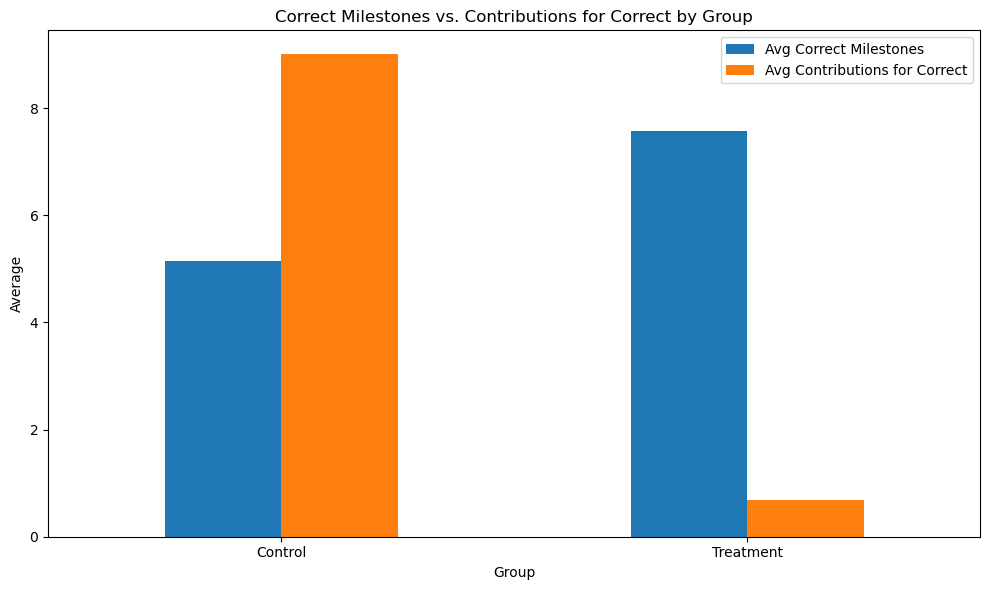

In [28]:
# Ensure the contribution columns are numeric
df['Control Contribs'] = pd.to_numeric(df['Control Contribs'], errors='coerce')
df['Alt Contrib'] = pd.to_numeric(df['Alt Contrib'], errors='coerce')

# Map 'Control Contribs' for Control group and 'Alt Contrib' for Treatment group
df['Contributions'] = df.apply(lambda row: row['Control Contribs'] if row['group'] == 'Control' else row['Alt Contrib'], axis=1)

# Mask correct milestones and use contributions values
correct_contributions_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_contributions_by_group[correct_col] = df['Contributions'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average contributions for participants who completed milestones correctly
avg_contrib_for_correct_by_group = df.groupby('group').apply(lambda group: correct_contributions_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_contrib_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Contributions for Correct': avg_contrib_for_correct_by_group.mean(axis=1)
})

# Plotting the result
comparison_correct_contrib_df.plot(kind='bar', figsize=(10, 6))

plt.title('Correct Milestones vs. Contributions for Correct by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
# Now we will calculate the average experience for each group, but only for participants who completed the milestone correctly ('y')


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_46195/242173790.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())


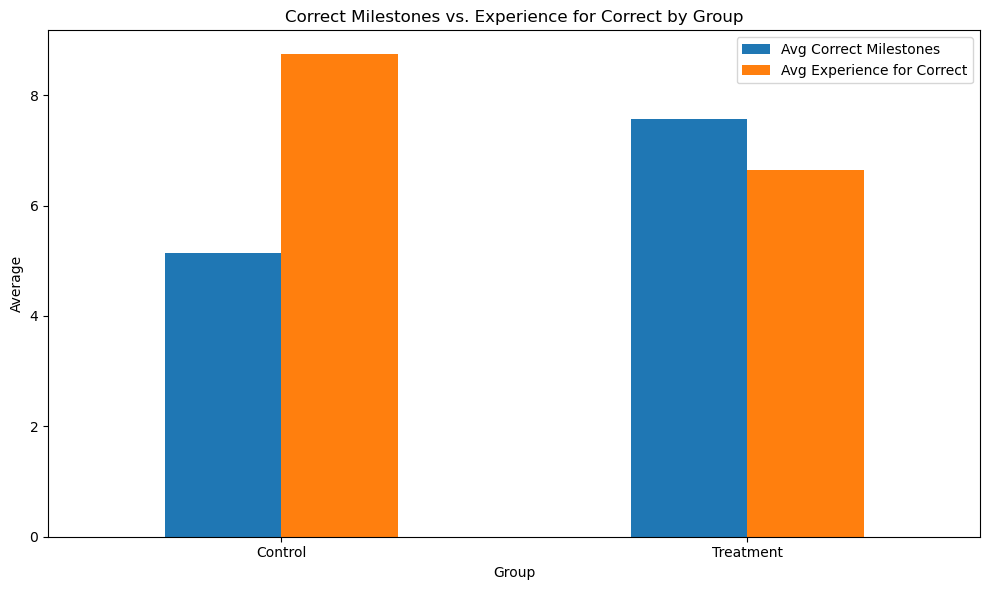

In [30]:

# We will mask the correct milestones marked as 'y' and use the corresponding experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average years of experience for each group based on correct milestones
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)  # Get the mean of experience for correct milestones
})

# Plotting the result
comparison_correct_experience_df.plot(kind='bar', figsize=(10, 6))

plt.title('Correct Milestones vs. Experience for Correct by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [31]:
# We will now calculate the average time taken to complete the correct milestones (those marked with 'y')
# First, we will filter the correct milestones based on 'y' and calculate the time taken for those

# Keeping the original milestone columns for time reference
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Combine the correct milestones and time columns to calculate average time only for correct milestones
correct_times_by_group = df.groupby('group').apply(
    lambda group: group.loc[group[correct_milestones_columns] == 'y', time_columns].mean()
)

# Plot the average times for correct milestones, divided by group
correct_times_by_group.T.plot(kind='bar', figsize=(10, 6))

plt.title('Average Time Taken for Correct Milestones, Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


KeyError: "None of [Index([          ('r', 'i', 'g', 'h', 't', ' ', 'f', 'o', 'l', 'd', 'e', 'r'),\n                           ('r', 'i', 'g', 'h', 't', ' ', 'f', 'i', 'l', 'e'),\n                      ('r', 'i', 'g', 'h', 't', ' ', 'c', 'l', 'a', 's', 's'),\n                 ('r', 'i', 'g', 'h', 't', ' ', 'm', 'e', 't', 'h', 'o', 'd'),\n                      ('r', 'i', 'g', 'h', 't', ' ', 'l', 'i', 'n', 'e', 's'),\n                                          ('c', 'o', 'r', 'r', 'e', 'c', 't'),\n       ('s', 'o', 'u', 'n', 'd', ' ', 's', 'o', 'l', 'u', 't', 'i', 'o', 'n')],\n      dtype='object')] are in the [index]"

/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_46195/779105002.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_correct_time_by_group = df.groupby('group').apply(lambda group: correct_time_taken.loc[group.index].mean())


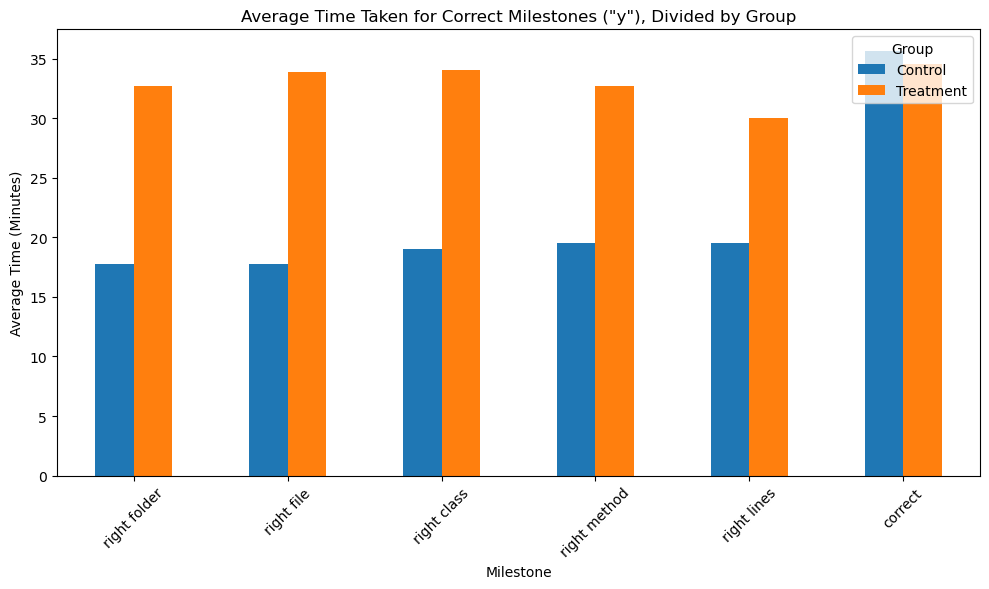

In [32]:
# We will map the columns with 'y' as correct and use the corresponding time values for these columns.
# This is done by masking the 'y' values in the correct milestones and using the corresponding time values from the time columns.

# First, ensure the relevant time columns are numeric
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce')

# Masking the correct milestones that are marked 'y' and selecting their corresponding time values
correct_time_taken = pd.DataFrame()
for correct_col, time_col in zip(correct_milestones_columns, time_columns):
    correct_time_taken[correct_col] = df[time_col].where(df[correct_col] == 'y')

# Now calculate the average time taken for the correct milestones, divided by group
average_correct_time_by_group = df.groupby('group').apply(lambda group: correct_time_taken.loc[group.index].mean())

# Plotting the result
average_correct_time_by_group.T.plot(kind='bar', figsize=(10, 6))

plt.title('Average Time Taken for Correct Milestones ("y"), Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
